# Sales Forecast

In [1]:
## Import the Required Libraries

import pandas as pd
import numpy as np
import string


## for graphs / visualization
import matplotlib.pyplot as plt
#import seaborn as sns

## for time series processing / visuals
import time
#import matplotlib.ticker as ticker

##ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Load datasets

train_df = pd.read_csv('Sales_Forecast_Data.csv')

In [3]:
## Display initial few lines

train_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Dataset features exploration

In [4]:
## display data types of all the columns in the dataframe

train_df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

### describe datasets - numeric features

In [5]:
train_df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


### describe datasets - categorical features

In [6]:
train_df.describe(include='O')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,1230,1326,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,5/9/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,34,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


### Check for null values in the dataset

In [7]:
# locate the columns with null values

train_df.isnull().any()

Row ID           False
Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code       True
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
dtype: bool

In [8]:
# count of non null records

train_df.notnull().sum()

Row ID           9800
Order ID         9800
Order Date       9800
Ship Date        9800
Ship Mode        9800
Customer ID      9800
Customer Name    9800
Segment          9800
Country          9800
City             9800
State            9800
Postal Code      9789
Region           9800
Product ID       9800
Category         9800
Sub-Category     9800
Product Name     9800
Sales            9800
dtype: int64

### identify column names with null values - another method

In [9]:
train_df.columns[train_df.isnull().any()]

Index(['Postal Code'], dtype='object')

### count of records with null values in the Credit_Product column

In [10]:
train_df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

**Postal code column has 11 records with null values. We will display those records here**

In [11]:
train_df[train_df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,5/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,7/11/2016,9/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,6/4/2017,10/4/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [12]:
## Cross-verify all the records for State of "Vermont" and City of "Burlington" and see if any of them have Postal codes

train_df[(train_df.City == 'Burlington') & (train_df.State == 'Vermont')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,5/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,7/11/2016,9/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,6/4/2017,10/4/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


#### As we can see, the dataset is mostly clean except for one of the columns - Postal Code having 11 records with NULL values. 
#### We further noticed that the Postal code is not populated only for State of "Vermont" and City of "Burlington".
#### Hence for convenience, we will replace the Postal code value with a default value of 05401 for these records.
#### Since Postal code column is a float / numeric, we will be allowed to assign 5401 as value for the these specific records.

In [13]:
train_df['Postal Code'][(train_df.City == 'Burlington') & (train_df.State == 'Vermont')] = 5401

## Data Cleanup and Prep

In [14]:
## Row ID column is a unique ID in the dataset. It may not help much with predictions. So, we can drop it

train_df.drop(columns=['Row ID'], inplace=True)

In [15]:
## Order Date and Ship Date columns are in dd/mm/yyyy format. They should be converted into standard date-time format
## This will help in time-series processing

train_df['Order Date'] = pd.to_datetime(train_df['Order Date'], format='%d/%m/%Y')
train_df['Ship Date']  = pd.to_datetime(train_df['Ship Date'], format='%d/%m/%Y')

In [16]:
## data sorting on Order Date

train_df.sort_values(by = ['Order Date'], ascending = True, inplace = True)

In [17]:
## rounding off the "Sales" amounts to 2 decimal places for ease calculations / analysis at later stages
train_df['Sales'] = train_df['Sales'].round(2)

## Exploratory Data Analysis with Visuals

### Aggregate Sales amounts Analysis by various features

**Highest Sales orders by States**

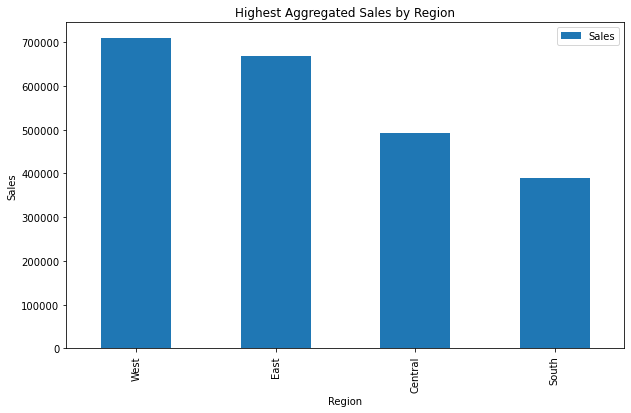

In [18]:
## we will store top Regions, in terms of highest gross sales amounts
high_sales_regions = train_df.groupby(['Region']).sum().sort_values('Sales', ascending=False)

high_sales_regions.drop(columns=['Postal Code'], inplace=True)

high_sales_regions.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Highest Aggregated Sales by Region')
plt.show()

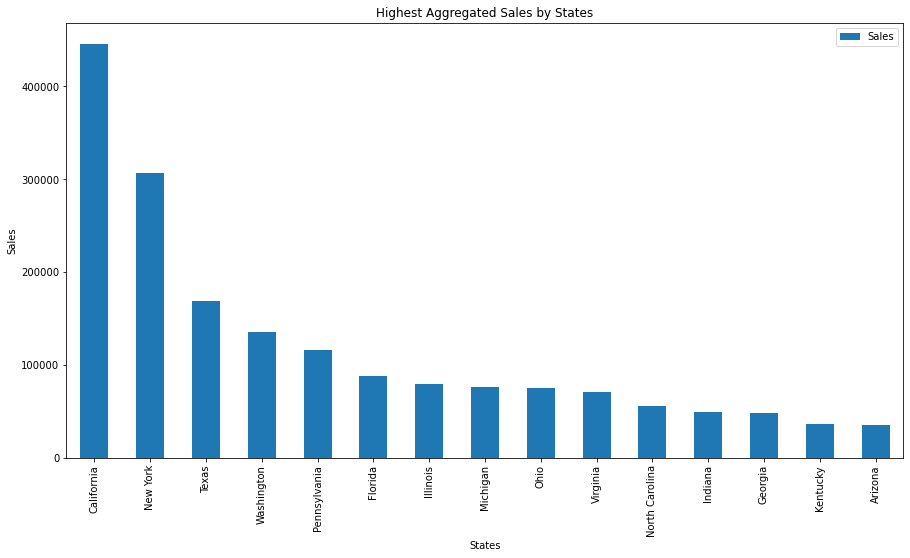

In [19]:
## we will store top 15 states, in terms of highest gross sales amounts
high_sales_states = train_df.groupby(['State']).sum().sort_values('Sales', ascending=False).head(15)


## while groupby function is used, we need to reset the index so that States column is added to the DataFrame
#high_sales_states.reset_index(inplace=True)

#print(type(high_sales_states))
high_sales_states.drop(columns=['Postal Code'], inplace=True)

high_sales_states.plot(kind='bar', figsize=(15, 8))
plt.xlabel('States')
plt.ylabel('Sales')
plt.title('Highest Aggregated Sales by States')
plt.show()

#### ==========================================================================================================
**Since multiple customers can have same / similar names, we will use Customer ID as first Unique key and combine it with Customer Name to view Customers with highest Sales orders**

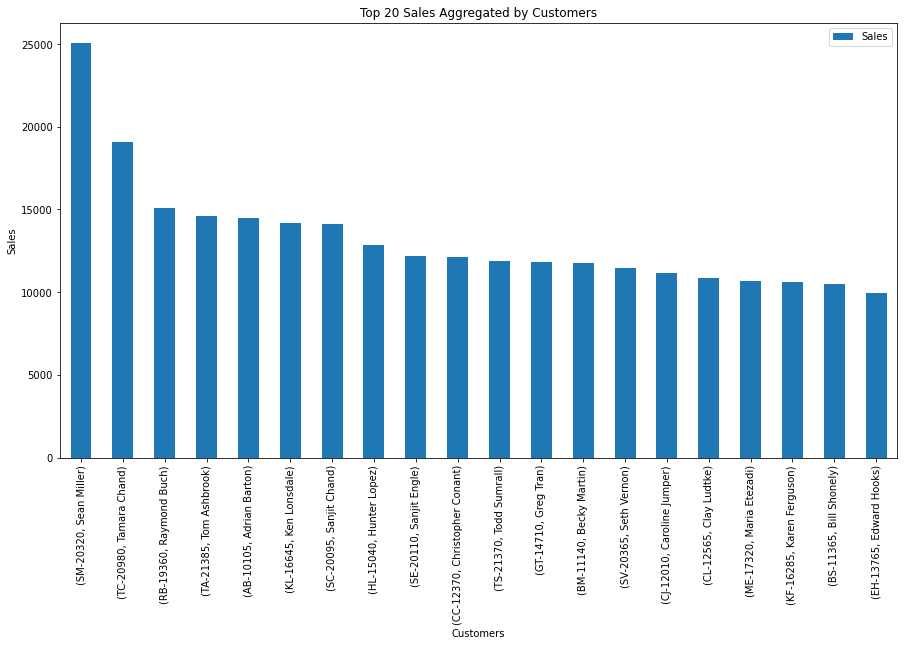

In [20]:
## we will store top 20 customers, in terms of highest gross sales amounts
high_sales_customers = train_df.groupby(['Customer ID', 'Customer Name']).sum().sort_values('Sales', ascending=False).head(20)


## while groupby function is used, we need to reset the index so that States column is added to the DataFrame
#high_sales_states.reset_index(inplace=True)

#print(type(high_sales_states))
high_sales_customers.drop(columns=['Postal Code'], inplace=True)

high_sales_customers.plot(kind='bar', figsize=(15, 8))
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.title('Top 20 Sales Aggregated by Customers')
plt.show()

#### ==========================================================================================================
**Since multiple States can have same / similar City names, we will use City Name / State as first Unique combination to view Cities with highest Sales orders**

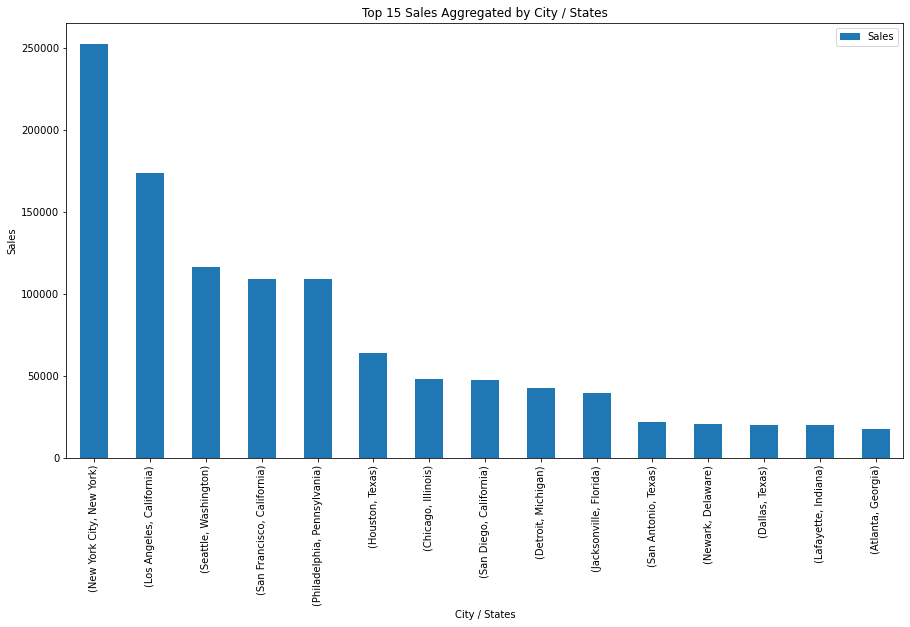

In [21]:
## we will store top 15 city/states, in terms of highest gross sales amounts
high_sales_cities = train_df.groupby(['City', 'State']).sum().sort_values('Sales', ascending=False).head(15)


## while groupby function is used, we need to reset the index so that States column is added to the DataFrame
#high_sales_states.reset_index(inplace=True)

#print(type(high_sales_states))
high_sales_cities.drop(columns=['Postal Code'], inplace=True)

high_sales_cities.plot(kind='bar', figsize=(15, 8))
plt.xlabel('City / States')
plt.ylabel('Sales')
plt.title('Top 15 Sales Aggregated by City / States')
plt.show()

### Highest Sales by Subcategories

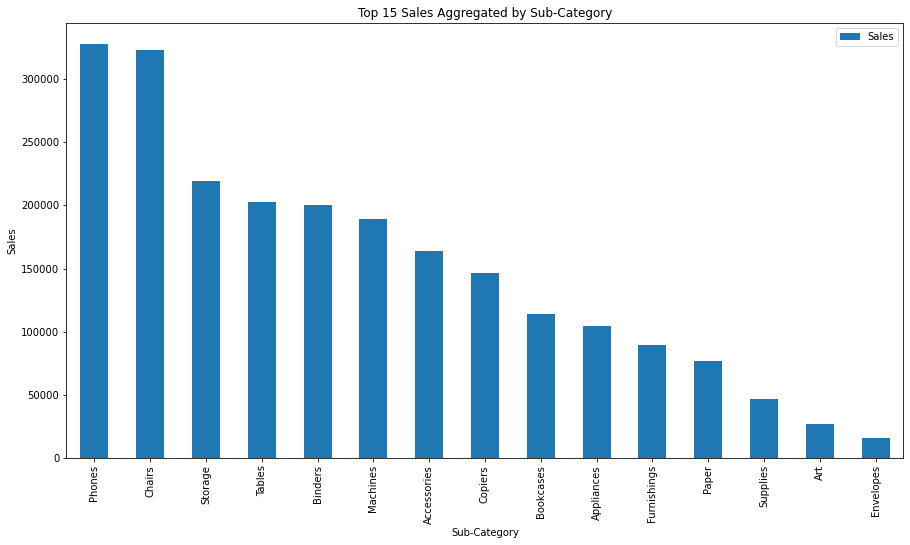

In [22]:
## we will store top 15 Sub-Categories, in terms of highest gross sales amounts
high_sales_subcats = train_df.groupby(['Sub-Category']).sum().sort_values('Sales', ascending=False).head(15)


## while groupby function is used, we need to reset the index so that States column is added to the DataFrame
#high_sales_states.reset_index(inplace=True)

#print(type(high_sales_subcats))
high_sales_subcats.drop(columns=['Postal Code'], inplace=True)

high_sales_subcats.plot(kind='bar', figsize=(15, 8))
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.title('Top 15 Sales Aggregated by Sub-Category')
plt.show()

### Sales by Shipping mode

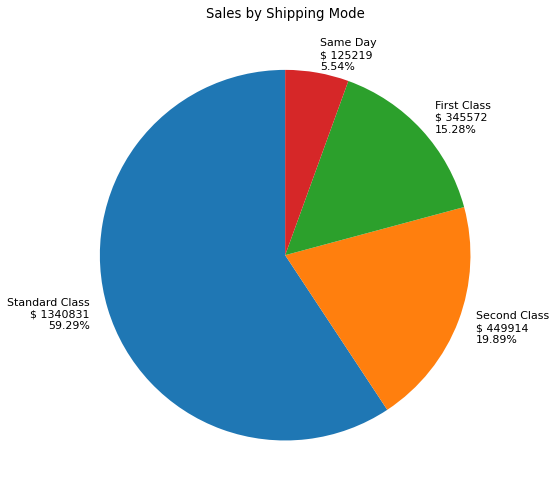

In [23]:
## we will store Shipping Mode level gross sales amounts
sales_shipping = train_df.groupby(['Ship Mode']).sum().sort_values('Sales', ascending=False)

sales_shipping['pct'] = sales_shipping['Sales'] * 100 / sales_shipping['Sales'].sum()


sales_shipping.reset_index(inplace=True)  ## create a temporary dataframe for matplotlib.pyplot labeled info

labs = []      ## labels variable inside ax1.pie takes in list / series. so define empty list here 

## populate 'labs' in below loop for displaying the information on the plot

for i in range(len(sales_shipping)):
    labs.append((sales_shipping['Ship Mode'].iloc[i] +'\n' 
                 + '$ '+ str(round(sales_shipping.Sales.iloc[i])) +'\n'
                 + str(round(sales_shipping.pct.iloc[i], 2)) + '%'
                ))


plt.rcParams["figure.figsize"] = (14,7) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 11 # Font size is defined

fig1, ax1 = plt.subplots()

#ax1.pie(sales_shipping['Sales'], labels=(sales_shipping.index), startangle=90)
#ax1.pie(sales_shipping['Sales'], labels=(round(sales_shipping.Sales, 2)), startangle=90)
ax1.pie(sales_shipping['Sales'], labels=labs, startangle=90)

fig = plt.gcf()
#ax1.axis('equal')  ## equal aspect ration for pie plot circle

plt.title("Sales by Shipping Mode")
plt.tight_layout()
plt.show()

### Sales by Customer Segments

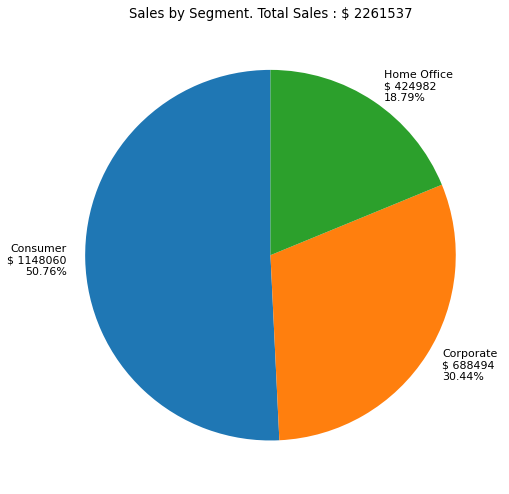

In [24]:
## we will store category level gross sales amounts
sales_segs = train_df.groupby(['Segment']).sum().sort_values('Sales', ascending=False)

sales_segs['pct'] = sales_segs['Sales'] * 100 / sales_segs['Sales'].sum()


sales_segs.reset_index(inplace=True)  ## create a temporary dataframe for matplotlib.pyplot labeled info

labs = []      ## labels variable inside ax1.pie takes in list / series. so define empty list here 

## populate 'labs' in below loop for displaying the information on the plot

for i in range(len(sales_segs)):
    labs.append((sales_segs.Segment.iloc[i] +'\n' 
                 + '$ '+ str(round(sales_segs.Sales.iloc[i])) +'\n'
                 + str(round(sales_segs.pct.iloc[i], 2)) + '%'))


plt.rcParams["figure.figsize"] = (14,7) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 11 # Font size is defined

fig1, ax1 = plt.subplots()

#ax1.pie(sales_cats['Sales'], labels=(sales_segs.index), startangle=90)
#ax1.pie(sales_cats['Sales'], labels=(round(sales_segs.Sales, 2)), startangle=90)
ax1.pie(sales_segs['Sales'], labels=labs, startangle=90)

fig = plt.gcf()
#ax1.axis('equal')  ## equal aspect ration for pie plot circle

plt.title(f"Sales by Segment. Total Sales : $ {round(sum(sales_segs.Sales))}")
plt.tight_layout()
plt.show()

### Sales by Categories - using pandas plots

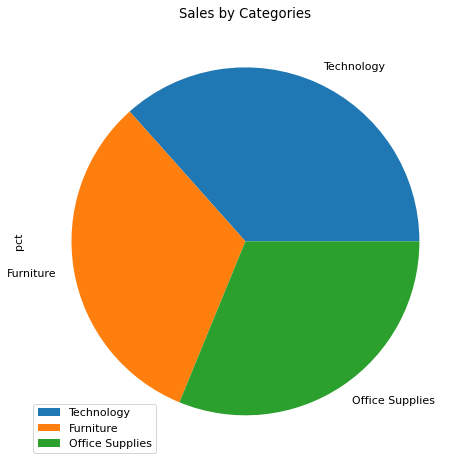

In [25]:
## we will store category level gross sales amounts
sales_cats = train_df.groupby(['Category']).sum().sort_values('Sales', ascending=False)

sales_cats['pct'] = sales_cats['Sales'] * 100 / sales_cats['Sales'].sum()

sales_cats.plot.pie(figsize=(15, 8), y='pct')
#plt.xlabel('Category')
#plt.ylabel('Sales')
plt.title('Sales by Categories')
plt.show()

In [26]:
sales_cats

,Postal Code,Sales,pct
Category,,,
Technology,100694078.0,827455.86,36.588215
Furniture,115548445.0,728658.50,32.219621
Office Supplies,324887441.0,705422.19,31.192164


### Sales by categories using matplotlib

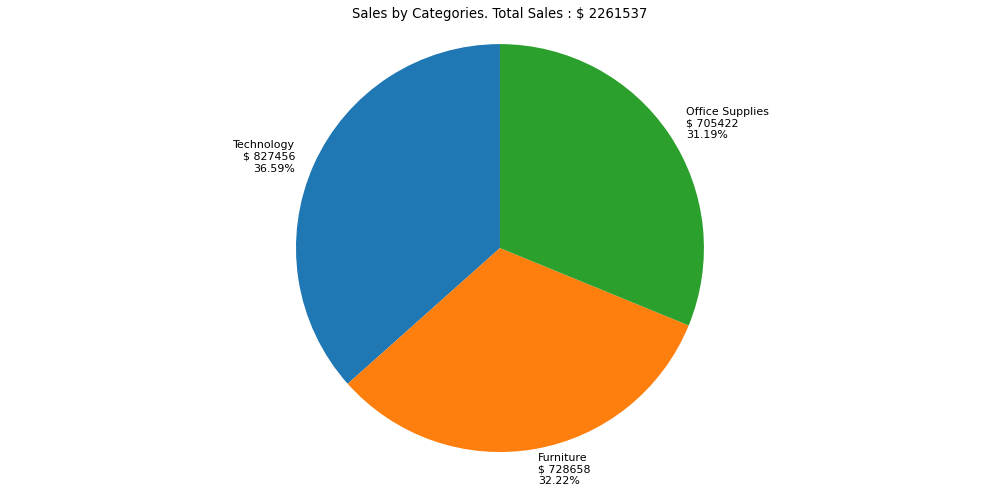

In [27]:
plt.rcParams["figure.figsize"] = (14,7) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 11 # Font size is defined

sales_cats2 = sales_cats.reset_index()  ## create a temporary dataframe for matplotlib.pyplot labeled info

labs = []      ## labels variable inside ax1.pie takes in list / series. so define empty list here 

## populate 'labs' in below loop for displaying the information on the plot

for i in range(len(sales_cats2)):
    labs.append((sales_cats2.Category.iloc[i] +'\n' 
                 + '$ '+ str(round(sales_cats2.Sales.iloc[i])) +'\n'
                 + str(round(sales_cats2.pct.iloc[i], 2)) + '%'))


fig1, ax1 = plt.subplots()

#ax1.pie(sales_cats['Sales'], labels=(sales_cats.index), startangle=90)
#ax1.pie(sales_cats['Sales'], labels=(round(sales_cats.Sales, 2)), startangle=90)
ax1.pie(sales_cats['Sales'], labels=labs, startangle=90)

fig = plt.gcf()
ax1.axis('equal')  ## equal aspect ration for pie plot circle

plt.title(f"Sales by Categories. Total Sales : $ {round(sum(sales_cats2.Sales))}")
plt.tight_layout()
plt.show()


### Sales by Product name

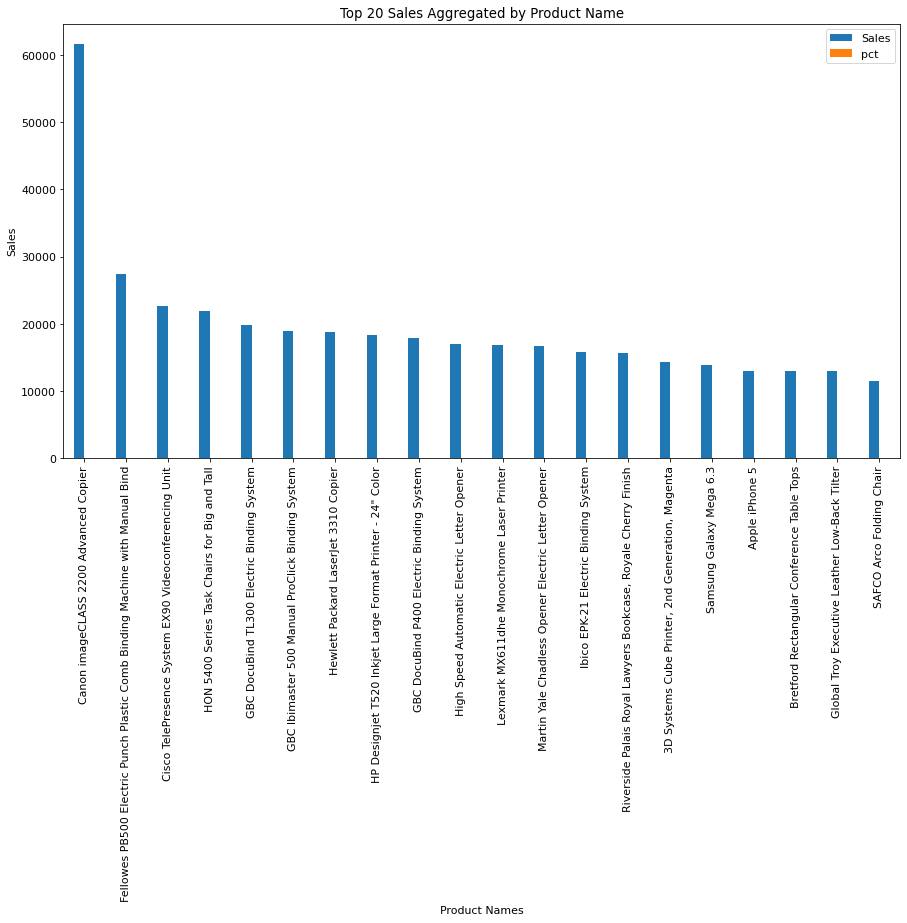

In [28]:
## we will store Prodct Name level gross sales amounts
sales_products = train_df.groupby(['Product Name']).sum().sort_values('Sales', ascending=False).head(20)

sales_products['pct'] = sales_products['Sales'] * 100 / sales_products['Sales'].sum()

## while groupby function is used, we need to reset the index so that States column is added to the DataFrame
#high_sales_states.reset_index(inplace=True)

#print(type(high_sales_subcats))
sales_products.drop(columns=['Postal Code'], inplace=True)

sales_products.plot(kind='bar', figsize=(15, 8))
plt.xlabel('Product Names')
plt.ylabel('Sales')
plt.title('Top 20 Sales Aggregated by Product Name')
plt.show()

## Analyze orders by Year of Order Date

In [29]:
temp_df = pd.DataFrame()
temp_df = train_df

temp_df['Order_Year'] = pd.DatetimeIndex(temp_df['Order Date']).year

temp_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Year
7980,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.45,2015
741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.54,2015
740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.74,2015
739,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.78,2015
1759,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.54,2015


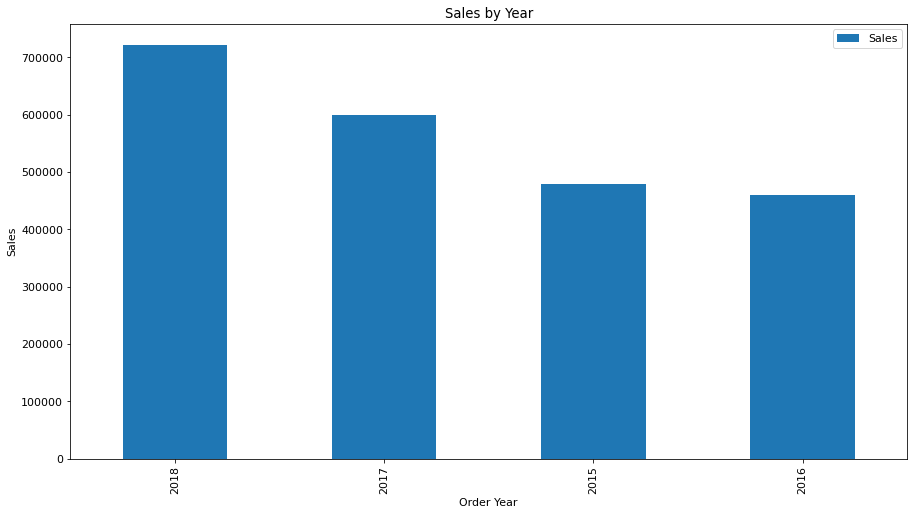

In [30]:
## we will store Prodct Name level gross sales amounts
sales_year = temp_df.groupby(['Order_Year']).sum().sort_values('Sales', ascending=False)

## while groupby function is used, we need to reset the index so that States column is added to the DataFrame
#high_sales_states.reset_index(inplace=True)

#print(type(high_sales_subcats))
sales_year.drop(columns=['Postal Code'], inplace=True)


sales_year.plot(kind='bar', figsize=(15, 8))
plt.xlabel('Order Year')
plt.ylabel('Sales')
plt.title('Sales by Year')
plt.show()

## Analyze orders by Month / Year of Order Date

In [31]:
temp_df['Order_Month'] = pd.DatetimeIndex(temp_df['Order Date']).month

In [32]:
## we will store month and year sales data
sales_mth_yr = temp_df.groupby(['Order_Year', 'Order_Month']).sum()

## while groupby function is used, we need to reset the index so that States column is added to the DataFrame
#high_sales_states.reset_index(inplace=True)

#print(type(high_sales_states))
sales_mth_yr.drop(columns=['Postal Code'], inplace=True)

In [33]:
sales_mth_yr

Sales
Order_Year Order_Month           
2015       1             14205.71
           2              4519.92
           3             55205.81
           4             27906.86
           5             23644.29
           6             34322.92
           7             33781.52
           8             27117.53
           9             81623.50
           10            31453.37
           11            77907.68
           12            68167.07
2016       1             18066.96
           2             11951.40
           3             32339.32
           4             34154.51
           5             29959.56
           6             23599.38
           7             28608.23
           8             36818.32
           9             63133.56
           10            31011.71
           11            75249.33
           12            74543.59
2017       1             18542.52
           2             22978.82
           3             51165.03
           4             38679.75
           5             56656.93
           6             39724.47
           7             38320.80
           8             30542.18
           9             69193.42
           10            59583.08
           11            79066.54
           12            95739.14
2018       1             43476.47
           2             19920.98
           3             58863.41
           4             35541.89
           5             43825.95
           6             48190.70
           7             44825.11
           8             62837.81
           9             86152.88
           10            77448.12
           11           117938.13
           12            83030.37

In [34]:
sales_mth_yr2 = sales_mth_yr.reset_index()
sales_mth_yr2

,Order_Year,Order_Month,Sales
0,2015,1,14205.71
1,2015,2,4519.92
2,2015,3,55205.81
3,2015,4,27906.86
4,2015,5,23644.29
5,2015,6,34322.92
6,2015,7,33781.52
7,2015,8,27117.53
8,2015,9,81623.50
9,2015,10,31453.37


In [35]:
sales_y2 = sales_mth_yr2.set_index('Order_Year')
sales_y2

,Order_Month,Sales
Order_Year,,
2015,1,14205.71
2015,2,4519.92
2015,3,55205.81
2015,4,27906.86
2015,5,23644.29
2015,6,34322.92
2015,7,33781.52
2015,8,27117.53
2015,9,81623.50


# Draw a plot - monthly sales, highlight each years with different colors

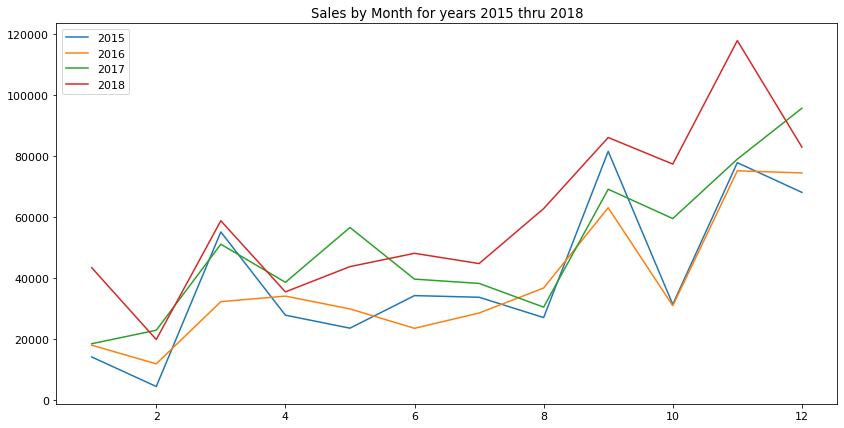

In [36]:
## plot the monthly sales data for each available year's data

for year in sales_mth_yr2['Order_Year'].unique():
    plt.plot(sales_mth_yr2[sales_mth_yr2['Order_Year'] == year]['Order_Month'], 
             sales_mth_yr2[sales_mth_yr2['Order_Year'] == year]['Sales'])

plt.title('Sales by Month for years 2015 thru 2018')
plt.legend(sales_mth_yr2['Order_Year'].unique())

plt.show()

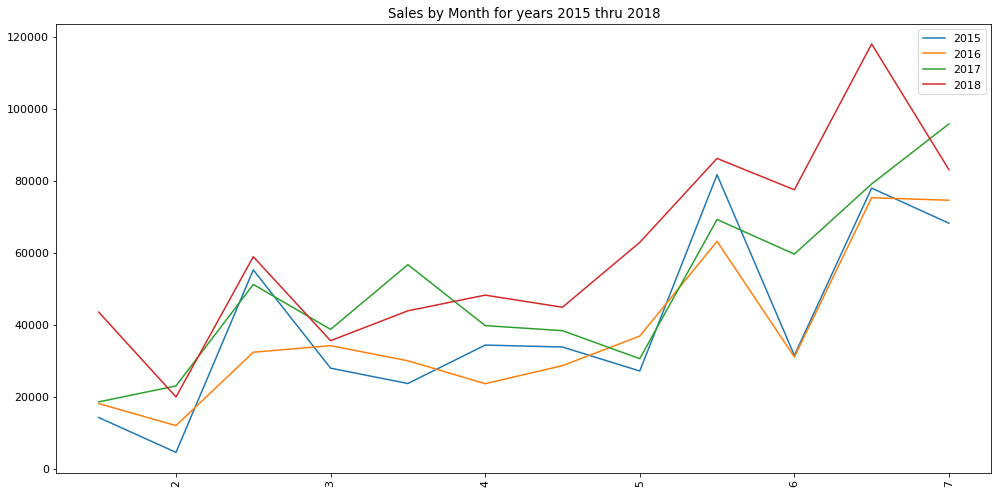

In [37]:
## another method for the same plot

fig, ax = plt.subplots()
ax.set_xticklabels(sales_mth_yr2['Order_Month'], rotation=90)

for name, group in sales_mth_yr2.groupby('Order_Year'):
    ax.plot(group['Order_Month'], group['Sales'], label=name)

plt.title('Sales by Month for years 2015 thru 2018')
ax.legend()
plt.tight_layout()
plt.show()

#### ===============================================================================================================================